<a href="https://colab.research.google.com/github/JaneSwissAust/2022_Intro_Python/blob/main/Exercises/W2_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise: Analyzing Ocean Floats Data using Numpy and Matplotlib

**Learning Goals**

*    Creating new arrays using `linspace` and `arange`
*    Computing basic formulas with `numpy` arrays
*    Loading data from `.npy` files
*    Performing reductions (e.g. `mean`, `std` on `numpy` arrays)
*    Making 1D line plots
*    Making scatterplots
*    Annotating plots with titles and axes

In this problem, we use real data from ocean profiling floats. [ARGO](http://www.argo.ucsd.edu/) floats are autonomous robotic instruments that collect Temperature, Salinity, and Pressure data from the ocean. [ARGO](http://www.argo.ucsd.edu/) floats collect one “profile” (a set of messurements at different depths or “levels”).

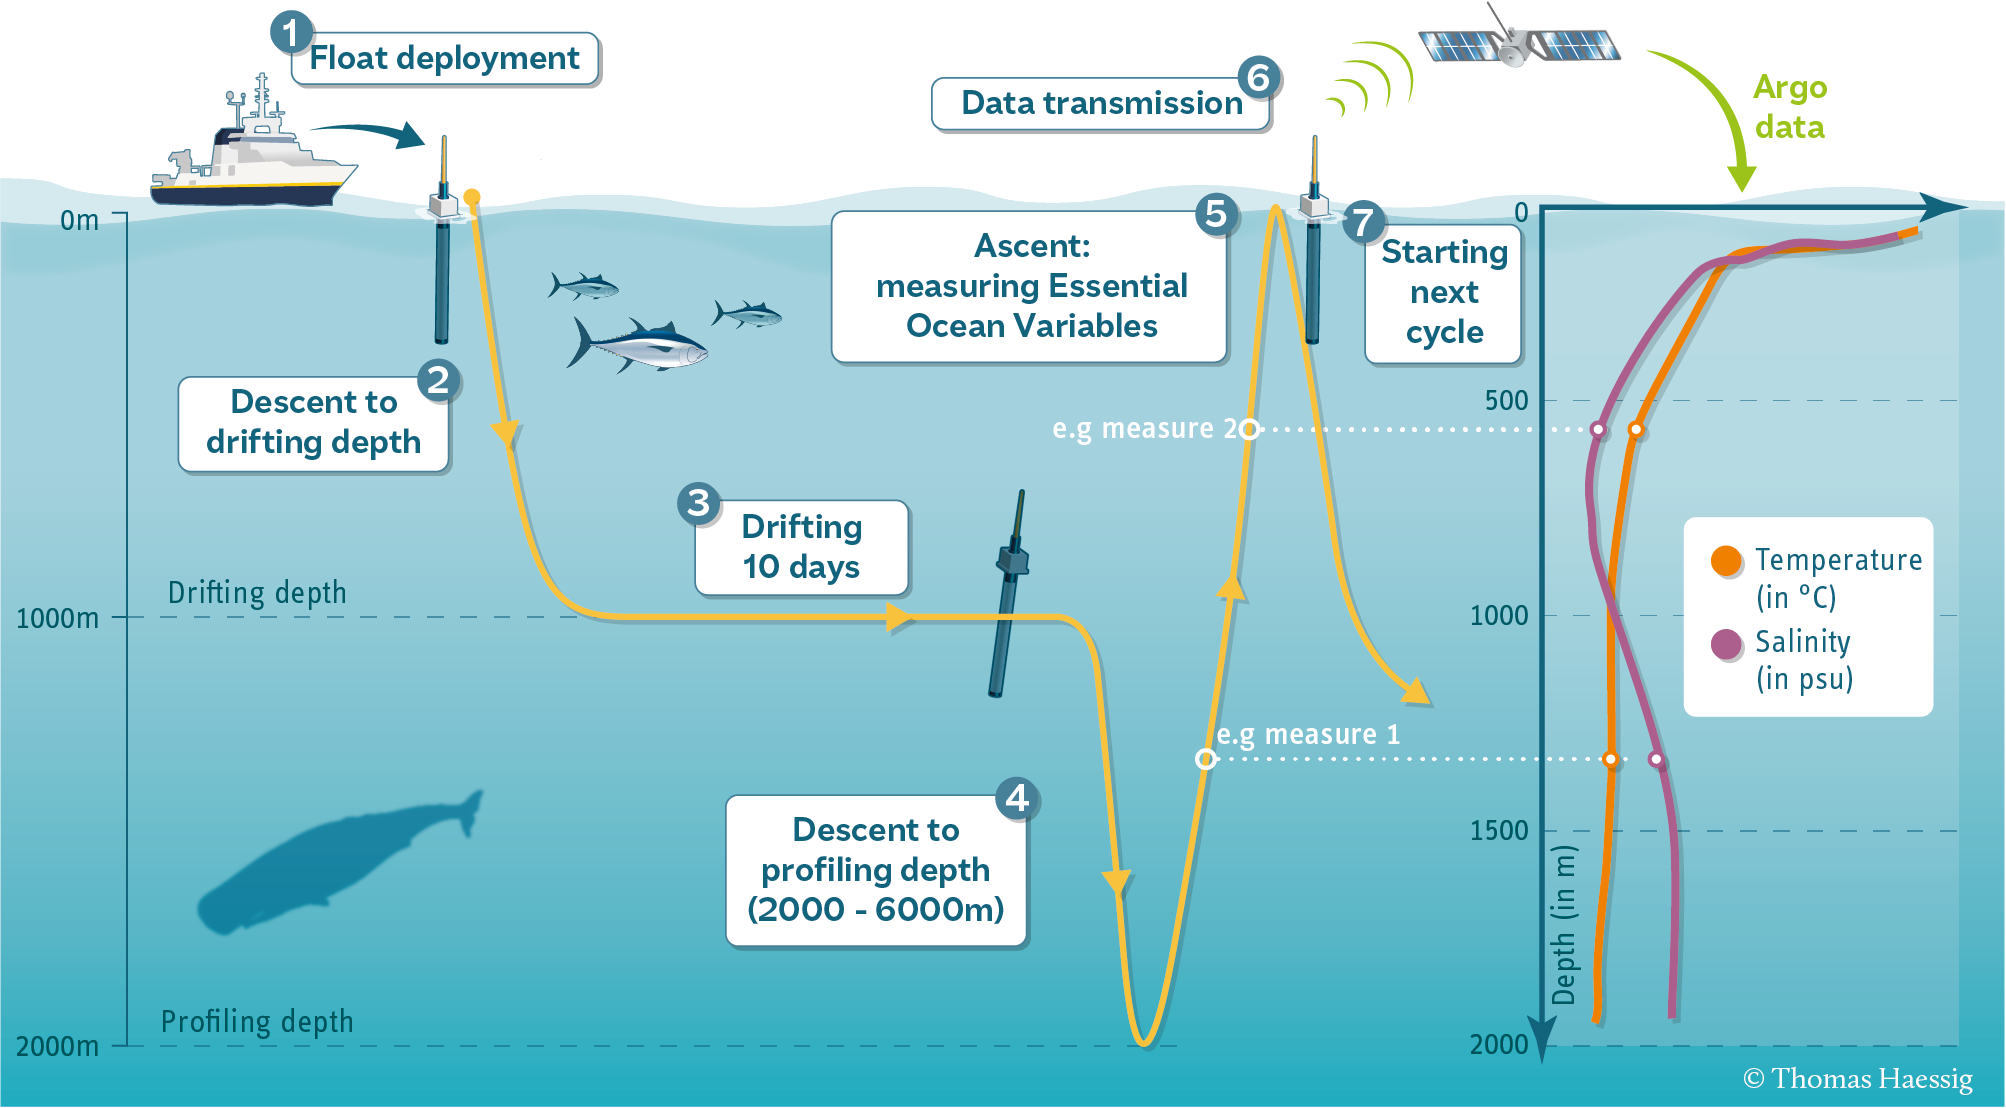


Each profile has a single latitude, longitude, and date associated with it, in addition to many different levels.

Let’s start by using [pooch](https://www.fatiando.org/pooch/latest/) to download the data files we need for this exercise. The following code will give you a list of `.npy` files that you can open in the next step.

In [3]:
import pooch

url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash='2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009')
files

['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy']

In [4]:
import numpy as np

**Q1) Load each data file as a `numpy` array.**

You can use whatever names you want for your arrays, but we recommend:

`T`: temperature

`S`: salinity

`P`: pressure

`date`: date

`lat`: latitude

`lon`: longitude

`level`: depth level

Hint 1: Look at the file name (the items in `files`) to know which files corresponds to which variable.

Hint 2: Check out the documentation for [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

Display the names of the items in files here

In [5]:
import os
#print(files)
#pathname='/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy'
#for i in range (7):
for i in range (len(files)):
  pathname=files[i]
  filename = pathname.split('/') 
  print(filename[-1])


S.npy
lon.npy
P.npy
T.npy
date.npy
lat.npy
levels.npy


Then, load the files as `numpy` arrays, for instance using list comprehension

In [6]:
P,S,levels,T,lat,lon,date = [np.load(files[i]) for i in range(len(files))]
#print(P)
#print(levels)

**Q2) Recreate the `level` array using `np.arange` and `np.linspace`**

Hints:

*   The documentation for `np.arange` is [at this link](https://numpy.org/devdocs/reference/generated/numpy.arange.html)
*   The documentation for `np.linspace` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
*   The documentation for `np.testing.assert_equal` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_equal.html)

Display the `level` array

In [177]:
#print(levels)
import numpy as np

new_levels= levels[np.isfinite(levels)]
print(new_levels)

new_T= T[np.isfinite(T)]
print(new_levels)

new_P= P[np.isfinite(P)]
print(new_levels)

new_S= S[np.isfinite(S)]
print(new_S)

#for i in range(75):
#    for j in range(78):
 #      if levels[i,j]='nan':
  #       nancount +=1

#print(nancount)

[   6.80000019    6.0999999     6.5        ... 2000.40002441 2000.30004883
 2000.40002441]
[   6.80000019    6.0999999     6.5        ... 2000.40002441 2000.30004883
 2000.40002441]
[   6.80000019    6.0999999     6.5        ... 2000.40002441 2000.30004883
 2000.40002441]
[39.13  34.38  34.11  33.828 33.552 33.621 33.71  33.944 33.956 33.524
 33.196 32.87  32.607 32.784 32.981 32.844 33.011 33.221 33.237 33.27
 33.199 33.263 33.093 32.65  32.305 32.306 32.368 32.224 32.19  32.318
 32.389 31.862 31.553 31.732 31.561 31.786 31.412 31.724 31.724 31.412
 31.786 31.561 31.732 31.553 31.862 32.389 32.318 32.19  32.224 32.368
 32.306 32.305 32.65  33.093 33.263 33.199 33.27  33.237 33.221 33.011
 32.844 32.981 32.784 32.607 32.87  33.196 33.524 33.956 33.944 33.71
 33.621 33.552 33.828 34.11  34.38 ]


Recreate the `level` array using `np.arange` and call it `level_arange`

In [175]:



#level_arange = np.arange(0,len(levels))
print(levels.size)
print(levels.shape)
#print(level_arange)
#print(levels[3,4])
print(new_levels.size)
print(new_levels.shape)



level_arange = np.arange(5850, dtype=float).reshape(78,75)
print(level_arange.shape, level_arange.size)
#print(level_arange)

nancount=0

for i in range(75):
#    for j in range(75):
       if S[i]=='nan':
         nancount +=1

for i in range(75):
#    for j in range(75):
       if S[i]<0:
         S2[i]=-1*S[i]


print('nancount is : ', nancount)
# remove the nan s
print(S)


5850
(78, 75)
5759
(5759,)
(78, 75) 5850
nancount is :  0
[39.13  34.38  34.11  33.828 33.552 33.621 33.71  33.944 33.956 33.524
 33.196 32.87  32.607 32.784 32.981 32.844 33.011 33.221 33.237 33.27
 33.199 33.263 33.093 32.65  32.305 32.306 32.368 32.224 32.19  32.318
 32.389 31.862 31.553 31.732 31.561 31.786 31.412 31.724 31.724 31.412
 31.786 31.561 31.732 31.553 31.862 32.389 32.318 32.19  32.224 32.368
 32.306 32.305 32.65  33.093 33.263 33.199 33.27  33.237 33.221 33.011
 32.844 32.981 32.784 32.607 32.87  33.196 33.524 33.956 33.944 33.71
 33.621 33.552 33.828 34.11  34.38 ]


Check that `level` and `level_arange` are equal using `np.testing.assert_equal`

In [176]:
from numpy.testing._private.utils import assert_equal
np.testing.assert_equal(new_levels,level_arange)

AssertionError: ignored

Recreate the `level` array using `np.linspace` and call it `level_linspace`

In [96]:
print(levels.size)
print(levels.shape)

#level_linspace = np.vander(np.linspace(1,5850,5850),5)


#x = np.linspace(1,5,num=5)

#print('x  ' , x)
#N=2

level_linspace = np.vander(np.linspace(1,2,num=78),75)

print('lll   ',level_linspace)
#level_linspace =  np.vander(x)

#np.vander((1, 2, 3, 4), 4)
#np.vander(np.linspace(0, 2, 5), 5)

#x = np.array([1, 2, 3, 5])
#xy = np.array(levels)
#N = 3
#array1= np.vander(x, N)
#print('xy   ', xy)

5850
(78, 75)
lll    [[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [2.59828590e+00 2.56497454e+00 2.53209025e+00 ... 1.02614269e+00
  1.01298701e+00 1.00000000e+00]
 [6.66946646e+00 6.50061921e+00 6.33604657e+00 ... 1.05262270e+00
  1.02597403e+00 1.00000000e+00]
 ...
 [7.17979171e+21 3.63713133e+21 1.84249416e+21 ... 3.89677855e+00
  1.97402597e+00 1.00000000e+00]
 [1.16641264e+22 5.87018127e+21 2.95427423e+21 ... 3.94822061e+00
  1.98701299e+00 1.00000000e+00]
 [1.88894659e+22 9.44473297e+21 4.72236648e+21 ... 4.00000000e+00
  2.00000000e+00 1.00000000e+00]]


Check that `level` and `level_linspace` are equal using `np.testing.assert_equal`

In [172]:
#___.___(___,___)

np.testing.assert_equal(level_linspace,level_linspace)

**Q3) Examine the shapes of `T`, `S` and `P` compared to `lon`, `lat`, `date` and `level`. How do you think they are related?**

Hint: Check out the [NDArrays subsection](#NDArrays)

Display the shapes of all loaded variables

In [54]:

print('\n one dimensional')
print('date:            ', date.shape)
print('longitude:       ', lon.shape)
print('latitude:        ', lat.shape)
print('salinity (S):    ', S.shape)

print('\n two dimensional')
print('levels:          ', levels.shape)
print('pressure (P):    ', P.shape)
print('temperature (T): ', T.shape) 

print('\n Shared dimensions : ')
print('- level          : date, salinity')
print('- pressure       : date, longitude, latitude')
print('- temperature    : date, longitude, latitude')

#transL = levels.transpose()
#print('levels transposed :',  levels.shape())







 one dimensional
date:             (78,)
longitude:        (75,)
latitude:         (75,)
salinity (S):     (75,)

 two dimensional
levels:           (78, 75)
pressure (P):     (78, 75)
temperature (T):  (78, 75)

 Shared dimensions : 
- level          : date, salinity
- pressure       : date, longitude, latitude
- temperature    : date, longitude, latitude


In [178]:
new_S.shape

(75,)

Based on the shapes, which dimensions do you think are shared among the arrays?

**Q4) Based on the formula below, calculate the seawater density `relative_density`, relative to pure water, as a function of the temperature, the salinity, and the pressure.**

`relative_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$

where:

*    The densities $\rho$ and $ρ_{Pure\ Water}$ are in units $kg/m^{3}$.
*    The constants $a$, $b$, and $c$ are provided below.
*    The function to calculate the conservative temperature $\Theta$ (in units Celcius) from temperature, salinity, and pressure is provided below.
*    The temperature $T$ is in units Celcius.
*    The salinity $S$ is in units $g/kg$.
*    The pressure $p$ is in units $dbar$.

Hint: The loaded `numpy` arrays `temperature`, `salinity`, and `pressure` already have the right units and no conversion is needed.

Sources: 

1) [*Roquet, Fabien, et al. "Defining a simplified yet “realistic” equation of state for seawater." Journal of Physical Oceanography 45.10 (2015): 2564-2579.*](https://journals.ametsoc.org/view/journals/phoc/45/10/jpo-d-15-0080.1.xml)

2) [*The Gibbs SeaWater (GSW)
Oceanographic Toolbox of TEOS-10*](https://www.teos-10.org/pubs/gsw/html/gsw_front_page.html). [(License)](https://www.teos-10.org/pubs/gsw/html/gsw_licence.html)

Below are the constants a, b, and c:

In [16]:
a = 7.718e-1 
b = -8.44e-2 
c = -4.561e-3

Let's import the library [`gsw`](https://teos-10.github.io/GSW-Python/) that contains the function `CS_from_t`to calculate the conservative temperature $\Theta$ from temperature, salinity, and pressure. 

In [179]:
!pip install gsw
from gsw import CT_from_t

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Now it's all up to you. Here's the equation to avoid having to scroll back up:

`relative_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$

Calculate the conservative temperature

Hint: use [CT_from_t](https://www.teos-10.org/pubs/gsw/html/gsw_CT_from_t.html)

In [189]:
import pandas as pd

transp_levels=pd.DataFrame(data=levels)

arrS = T
#print(arrS)
for i in range (77):
  for j in range (75):
    arrS[i,j]=S[j]

print('arrS shape               :', arrS.shape)
print('P shape                  :', P.shape)
print('T shape                  :',T.shape)
print('levels shape             :',levels.shape)
print('transposed levels shape  :',transp_levels.shape)
#print(levels[1,1])
#print(transp_levels[1,1])

CT = CT_from_t(S,T,P)
#CT = CT_from_t(new_S,new_T,new_P)
#CT2 = gsw_CT_from_t(S,T,P)
print(CT.shape)
print(CT)
#print(arrS)
#print(P)
#print(T)

#print('conservative temperature: ', conservative_temperature)


nonans_CT= CT[np.isfinite(CT)]
print('no nans CT:',  nonans_CT)

arrS shape               : (78, 75)
P shape                  : (78, 75)
T shape                  : (78, 75)
levels shape             : (78, 75)
transposed levels shape  : (78, 75)
(78, 75)
[[38.94157701 34.43070229 34.17274553 ... 33.90309527 34.17268949
  34.43065993]
 [38.94157854 34.43070036 34.17274526 ... 33.90309799 34.17274255
  34.4306602 ]
 [38.94156393 34.43069926 34.17274553 ... 33.90310206 34.17272094
  34.43066075]
 ...
 [38.94179708 34.43086491 34.17292301 ... 33.90333597 34.17291839
  34.43085861]
 [38.94179708 34.43086491 34.17292355 ... 33.90333652 34.17291948
  34.43085943]
 [ 3.69608413  3.74650586  3.72812734 ...         nan  3.71712622
          nan]]
no nans CT: [38.94157701 34.43070229 34.17274553 ...  3.76499328  3.73648685
  3.71712622]


Calculate the `relative density` using the equation above

In [194]:
relative_density = a*S + b * CT + c  * CT**2
print(relative_density)



nonans_RD= relative_density[np.isfinite(relative_density)]

print('nonans CT:', nonans_CT)

[[19.99735278 18.22158919 18.11568949 ... 18.00452514 18.11571169
  18.22160607]
 [19.99735211 18.22158996 18.1156896  ... 18.00452407 18.11569067
  18.22160596]
 [19.99735853 18.22159039 18.11568949 ... 18.00452246 18.11569923
  18.22160574]
 ...
 [19.99725603 18.22152439 18.11561919 ... 18.00443038 18.11562102
  18.2215269 ]
 [19.99725603 18.22152439 18.11561897 ... 18.00443017 18.11562059
  18.22152657]
 [29.82627651 26.15425931 25.94805102 ...         nan 25.94935308
          nan]]
nonans CT: [38.94157701 34.43070229 34.17274553 ...  3.76499328  3.73648685
  3.71712622]


**Q4) Make a plot for each column of data in `T`, `S`, `P`, and 
`relative_density` (four plots)**

For this question, we have to use the [Pyplot interface](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) of the [Matplotlib library](https://matplotlib.org/) for visualization even if we have not covered it extensively in class yet. But fear not as we provide easy-to-follow instructions below. 😊

The first step is to import Pyplot. Simply execute the code below.

In [22]:
import matplotlib.pyplot as plt

Then, we will plot variables as a function of the ocean depth, `level`. Simply read the documentation [at this link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to infer the correct syntax. Label your axes using `plt.xlabel` and `plt.ylabel`, and add a title using `plt.title`.

Hint: The vertical scale should use the `level` data to be consistent with oceanographic conventions. 

Hint 2: Each plot should have a line for each column of data. It will look messy, like the plot below:

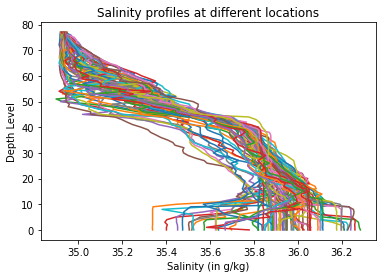

Text(0.5, 1.0, 'Pressure Profiles at Different Dates')

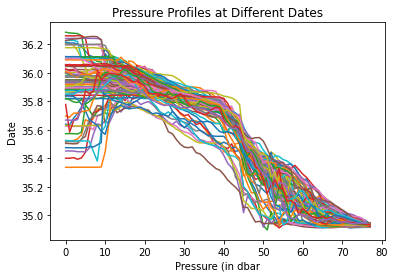

In [187]:
plt.plot(date,P); # The semi-colon prevents printing the line objects
plt.xlabel('Pressure (in dbar') # Takes a string as argument
plt.ylabel('Date')
plt.title('Pressure Profiles at Different Dates')



Make more plots below:

Text(0.5, 1.0, 'Temperature Profiles at Different Depths')

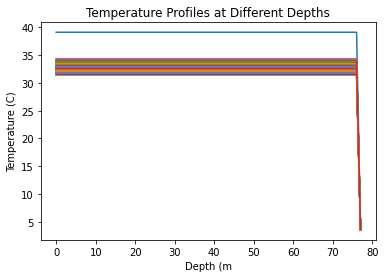

In [125]:
plt.plot(date,T); # The semi-colon prevents printing the line objects
plt.xlabel('Depth (m') # Takes a string as argument
plt.ylabel('Temperature (C)')
plt.title('Temperature Profiles at Different Depths')

Text(0.5, 1.0, 'Salinity Profiles at Different longitudes')

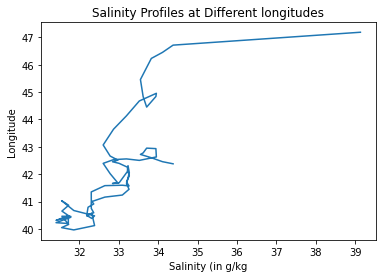

In [132]:
plt.plot(S,lon); # The semi-colon prevents printing the line objects
plt.xlabel('Salinity (in g/kg') # Takes a string as argument
plt.ylabel('Longitude')
plt.title('Salinity Profiles at Different longitudes')

Text(0.5, 1.0, 'Depth Profiles at Different Dates')

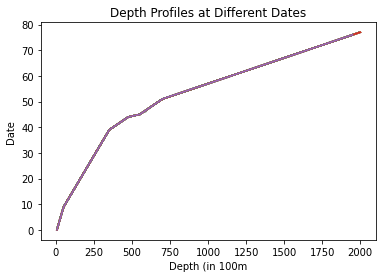

In [131]:


plt.plot(levels,date); # The semi-colon prevents printing the line objects
plt.xlabel('Depth (in 100m') # Takes a string as argument
plt.ylabel('Date ')
plt.title('Depth Profiles at Different Dates')


**Q5) Compute the mean and standard deviation of each of `T`, `S`, `P`, and `seawater_density` at each depth in `level`.**

Hint: You may want to read the documentation at [this link](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) and [this link](https://numpy.org/doc/stable/reference/generated/numpy.std.html). 

Hint 2: You can check that you took the mean and standard deviations along the correct axes by checking the `shape` of your results.

Compute the means...

In [259]:
meanT0 = np.mean(T,axis=0)
print('mean T axis 0 value:','{:.2f}'.format(meanT0[1]))
print('mean T axis 0 shape:', meanT0.shape, '\n')

meanT1 = np.mean(T,axis=1)
print('mean T axis 1 value:','{:.2f}'.format(meanT1[0]))
print('mean T axis 1 shape:', meanT1.shape, '\n')

meanP0 = np.mean(P,axis=0)
print('mean P axis 0 value:','{:.2f}'.format(meanP0[7]))
print('mean P axis 0 shape:', meanP0.shape, '\n')
print('mean P:', meanP0)

meanP1 = np.mean(P,axis=1)
print('mean P axis 1 value:','{:.2f}'.format(meanP1[1]))
print('mean P axis 1 shape:', meanP1.shape)


meanS0 = np.mean(S,axis=0)
print('mean S axis 0 value:','{:.2f}'.format(meanS0))
print('mean S axis 0 shape:', meanS0.shape, '\n')

meanRD0 = np.mean(relative_density,axis=0)
#print('mean relative_density axis 0 value:',meanRD0)
#print('mean relative_density axis 0 shape:', meanRD0.shape, '\n')

meanRD1 = np.mean(relative_density,axis=1)
#print('mean relative_density axis 1 value:', meanRD1)
#print('mean relative_density axis 1 shape:', meanRD1.shape, '\n')

nonans_meanRD0= meanRD0[np.isfinite(meanRD0)]
print('mean relative_density axis 1 value:', nonans_meanRD0)
print('mean relative_density axis 1 shape:', nonans_meanRD0.shape, '\n')

nonans_meanRD1= meanRD1[np.isfinite(meanRD1)]
print('mean relative_density axis 1 value:', nonans_meanRD1)
print('mean relative_density axis 1 shape:', nonans_meanRD1.shape, '\n')



#meannonans_RD0 = np.mean(nonans_RD,axis=0)
#print('mean relative_density axis 0 value:', meanRD0)
#print('mean relative_density axis 0 shape:', meanRD0.shape, '\n')




mean T axis 0 value: 33.99
mean T axis 0 shape: (75,) 

mean T axis 1 value: 32.91
mean T axis 1 shape: (78,) 

mean P axis 0 value: 35.37
mean P axis 0 shape: (75,) 

mean P: [35.4300408  35.39465004 35.41946509 35.36729094 35.31889211 35.29478699
         nan 35.37124908         nan 35.34899849         nan 35.42966099
         nan 35.53971168         nan 35.56845851         nan 35.55401357
         nan 35.50498659         nan 35.53228598         nan 35.49372751
         nan         nan         nan 35.56759267         nan 35.61186756
         nan 35.57222195         nan 35.56442378         nan 35.54277215
         nan         nan         nan 35.62780463 35.64723328         nan
         nan 35.64025414         nan 35.63505564         nan         nan
 35.63838289         nan         nan 35.61901004         nan 35.59733934
         nan 35.58581944         nan 35.55439577         nan 35.52035777
         nan 35.5017442          nan 35.58210309         nan 35.58704772
         nan 35.52519

In [ ]:
___
___
___

... and the standard deviations.

In [267]:
stdT = np.std(T,axis=0)
print('standard deviation of T ax0 : ', '{:.2f}'.format(stdT[1]))

stdT = np.std(T,axis=1)
print('standard deviation of T ax1 : ', '{:.2f}'.format(stdT[1]))

stdP = np.std(P,axis=0)
print('standard deviation of P ax0 : ', '{:.2f}'.format(stdP[1]))

stdP = np.std(P,axis=1)
print('standard deviation of P ax1 : ', '{:.2f}'.format(stdP[1]))

stdS = np.std(S,axis=0)
#print('standard deviation of S ax0 : ', (stdS)
#print('standard deviation of S ax0 : ', '{:.2f}'.format(stdS[1]))



stdCT = np.std(CT,axis=1)
print('standard deviation of CT ax0 : ', '{:.2f}'.format(stdCT[1]))

stdCT = np.std(CT,axis=1)
print('standard deviation of CT ax1 : ', '{:.2f}'.format(stdCT[1]))





standard deviation of T ax0 :  3.45
standard deviation of T ax1 :  1.06
standard deviation of P ax0 :  0.38
standard deviation of P ax1 :  nan
standard deviation of CT ax0 :  nan
standard deviation of CT ax1 :  nan


Check that they have the same shape as your vertical level `lev` coordinate:

In [270]:
np.testing.assert_equal(T.shape,levels.shape)

**Q6) Now make similar plots, but show only the mean `T`, `S`, `P`, and `seawater_density` at each depth. Show error bars on each plot using the standard deviations.**

Hint: If you are feeling adventurous, you can directly use the [`plt.errorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) function.

Hint 2: You should get plots similar to the one below

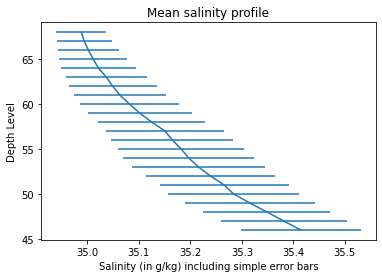

ValueError: ignored

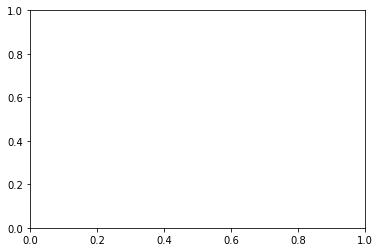

In [297]:



fig = plt.figure()
x = meanP1
y = levels
yerr = np.linspace(75, 78, 5850)

plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')

plt.errorbar(x, y + 2, yerr=yerr, uplims=True, label='uplims=True')

plt.errorbar(x, y + 1, yerr=yerr, uplims=True, lolims=True,
             label='uplims=True, lolims=True')

upperlimits = [True, False] * 5
lowerlimits = [False, True] * 5
plt.errorbar(x, y, yerr=yerr, uplims=upperlimits, lolims=lowerlimits,
             label='subsets of uplims and lolims')

plt.legend(loc='lower right')

#plt.errorbar(levels,meanT1,xerr=1)
#plt.xlabel('Depth 100m')
#plt.ylabel('mean Salinity9')
#plt.title('Plot of Salinity against Depth')

Three more plots and we'll be all set! 🙂

In [ ]:

fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)

plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')

plt.errorbar(x, y + 2, yerr=yerr, uplims=True, label='uplims=True')

plt.errorbar(x, y + 1, yerr=yerr, uplims=True, lolims=True,
             label='uplims=True, lolims=True')

upperlimits = [True, False] * 5
lowerlimits = [False, True] * 5
plt.errorbar(x, y, yerr=yerr, uplims=upperlimits, lolims=lowerlimits,
             label='subsets of uplims and lolims')

plt.legend(loc='lower right')

**Q7) Account For Missing Data**

The profiles contain many missing values. These are indicated by the special “Not a Number” value, or `np.nan`.

When you take the mean or standard deviation of data with NaNs in it, the entire result becomes `NaN`. Instead, if you use the special functions `np.nanmean` and `np.nanstd`, you tell NumPy to ignore the NaNs.

Recalculate the means and standard deviations as in the previous sections using these functions and plot the results.

Hint: Links to the [`np.nanmean` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) and the [`np.nanstd` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html).

Recalculate the means below ignoring the missing values. We trust that you can now come up with the full syntax yourself 😎

In [275]:
meanT0 = np.mean(T,axis=0)
print('hello')
print('mean T axis 0 value:','{:.2f}'.format(meanT0[1]))
print('mean T axis 0 shape:', meanT0.shape, '\n')

meanT1 = np.mean(T,axis=1)
print('mean T axis 1 value:','{:.2f}'.format(meanT1[0]))
print('mean T axis 1 shape:', meanT1.shape, '\n')



meanP0 = np.mean(P,axis=0)
#print('mean P axis 0 value:','{:.2f}'.format(meanP0[7]))
#print('mean P axis 0 shape:', meanP0.shape, '\n')
#print('mean P:', meanP0)


nonans_meanP0= meanP0[np.isfinite(meanP0)]
print('mean nonans P axis 0 value:','{:.2f}'.format(nonans_meanP0[7]))
print('mean nonans P axis 0 shape:', nonans_meanP0.shape, '\n')


meanP1 = np.mean(P,axis=1)
nonans_meanP1= meanP1[np.isfinite(meanP1)]

print('mean P axis 1 value:','{:.2f}'.format(nonans_meanP1[1]))
print('mean P axis 1 shape:', nonans_meanP1.shape)


meanS0 = np.mean(S,axis=0)
print('mean S axis 0 value:','{:.2f}'.format(meanS0))
print('mean S axis 0 shape:', meanS0.shape, '\n')

meanRD0 = np.mean(relative_density,axis=0)
#print('mean relative_density axis 0 value:',meanRD0)
#print('mean relative_density axis 0 shape:', meanRD0.shape, '\n')

meanRD1 = np.mean(relative_density,axis=1)
#print('mean relative_density axis 1 value:', meanRD1)
#print('mean relative_density axis 1 shape:', meanRD1.shape, '\n')

nonans_meanRD0= meanRD0[np.isfinite(meanRD0)]
print('mean relative_density axis 1 value:', nonans_meanRD0)
print('mean relative_density axis 1 shape:', nonans_meanRD0.shape, '\n')

nonans_meanRD1= meanRD1[np.isfinite(meanRD1)]
print('mean relative_density axis 1 value:', nonans_meanRD1)
print('mean relative_density axis 1 shape:', nonans_meanRD1.shape, '\n')




hello
mean T axis 0 value: 33.99
mean T axis 0 shape: (75,) 

mean T axis 1 value: 32.91
mean T axis 1 shape: (78,) 

mean nonans P axis 0 value: 35.35
mean nonans P axis 0 shape: (37,) 

mean P axis 1 value: 35.38
mean P axis 1 shape: (23,)
mean S axis 0 value: 32.91
mean S axis 0 shape: () 

mean relative_density axis 1 value: [20.12333791 18.32327773 18.21608866 18.10357352 17.99290337 18.02074731
 18.1501416  17.98173373 17.71691734 17.6818618  17.70626653 17.85933368
 17.87923986 17.8761985  17.62697697 17.45232595 17.49109777 17.30273591
 17.24875079 17.27121831 17.11524474 17.27103453 17.17423298 17.52026936
 17.45228908 17.48564934 17.80755518 17.85047531 17.86587379 17.77411493
 17.76197997 17.60949809 17.84909071 18.1546595  18.05621535 17.99280282
 18.21611527]
mean relative_density axis 1 shape: (37,) 

mean relative_density axis 1 value: [17.63443156 17.63442815 17.63442478 17.63442134 17.63441813 17.63441624
 17.63441345 17.63441104 17.6344091  17.63440764 17.63440585 17.

Similarly, recalculate the standard deviations ignoring the missing values.

In [ ]:
stdT = np.std(T,axis=0)
print('standard deviation of T ax0 : ', '{:.2f}'.format(stdT[1]))

stdT = np.std(T,axis=1)
print('standard deviation of T ax1 : ', '{:.2f}'.format(stdT[1]))

stdP = np.std(P,axis=0)
print('standard deviation of P ax0 : ', '{:.2f}'.format(stdP[1]))

stdP = np.std(P,axis=1)
print('standard deviation of P ax1 : ', '{:.2f}'.format(stdP[1]))

stdS = np.std(S,axis=0)
#print('standard deviation of S ax0 : ', (stdS)
#print('standard deviation of S ax0 : ', '{:.2f}'.format(stdS[1]))



stdCT = np.std(CT,axis=1)
print('standard deviation of CT ax0 : ', '{:.2f}'.format(stdCT[1]))

stdCT = np.std(CT,axis=1)
print('standard deviation of CT ax1 : ', '{:.2f}'.format(stdCT[1]))


**Q8) Create a scatter plot of the longitudinal (`lon`) and latitudinal (`lat`) coordinates of the ARGO floats.**

Again, we have not discussed it in the tutorial, but there is a really convenient scatter plot function called [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) provided by the Pyplot interface. 

Bonus: Label your figure using `plt.xlabel`, `plt.ylabel`, and `plt.title`.

Bonus 2: Increase the fontsize of your labels by adding a `fontsize=` argument to the label functions.

Bonus 3: Make your scatter plot beautiful by changing the arguments of [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) listed in the documentation, for example `s=`.

(75,)

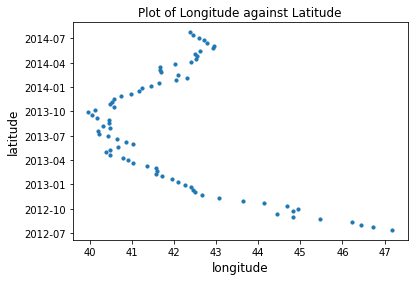

In [286]:
plt.scatter(lon,lat, s=10)
plt.xlabel('longitude', fontsize=12)
plt.ylabel('latitude', fontsize=12)
plt.title('Plot of Longitude against Latitude', fontsize=12)



___ # Fancy bonuses
___ # More fancy bonuses